# Importing Data / Preprocessing

In [1]:
# Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [3]:
import re
import string
import gzip
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pyplot
from pandas import option_context
from sklearn import preprocessing
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,classification_report,confusion_matrix
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
# Reading Data
meta_sports = getDF('/content/drive/MyDrive/Data Files/meta_Sports_and_Outdoors.json.gz')
meta_sports.head(3)

,asin,title,price,imUrl,related,brand,categories,salesRank,description
0,0000032069,Adult Ballet Tutu Cheetah Pink,7.89,http://ecx.images-amazon.com/images/I/51EzU6qu...,"{'also_bought': ['0000032050', 'B00D0DJAEG', '...",BubuBibi,"[[Sports & Outdoors, Other Sports, Dance, Clot...",NaN,NaN
1,0000031909,Girls Ballet Tutu Neon Pink,7.00,http://ecx.images-amazon.com/images/I/41xBoP0F...,"{'also_bought': ['B002BZX8Z6', 'B00JHONN1S', '...",Unknown,"[[Sports & Outdoors, Other Sports, Dance]]",{'Toys & Games': 201847},High quality 3 layer ballet tutu. 12 inches in...
2,0000032034,Adult Ballet Tutu Yellow,7.87,http://ecx.images-amazon.com/images/I/21GNUNIa...,"{'also_bought': ['B00D2JSRFQ', '0000032042', '...",BubuBibi,"[[Sports & Outdoors, Other Sports, Dance, Clot...",NaN,NaN


In [ ]:
# Reading Data
review_sports = getDF('/content/drive/MyDrive/Data Files/reviews_Sports_and_Outdoors.json.gz')
review_sports.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3PMSRCL80KSA1,0000031852,Dee,"[0, 0]",Tutus are cute but a little thin. Can't compla...,4.0,Not bad,1388275200,"12 29, 2013"
1,A1SNLWGLFXD70K,0000031852,DEVA,"[0, 0]",I origonally didn't get the item I ordered. W...,4.0,Happy with purchase even though it came a lot ...,1392940800,"02 21, 2014"
2,A1KJ4CVG87QW09,0000031852,Donna Carter-Scott,"[0, 0]","Arrived very timely, cute grandbaby loves it. ...",4.0,Cute Tutu,1389657600,"01 14, 2014"


In [ ]:
# Merging Data
merge_data = pd.merge(review_sports,meta_sports,on='asin',how='inner')

In [ ]:
# Data Head
merge_data.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,title,price,imUrl,related,brand,categories,salesRank,description
0,A3PMSRCL80KSA1,0000031852,Dee,"[0, 0]",Tutus are cute but a little thin. Can't compla...,4.0,Not bad,1388275200,"12 29, 2013",Girls Ballet Tutu Zebra Hot Pink,3.17,http://ecx.images-amazon.com/images/I/51fAmVkT...,"{'also_bought': ['B00JHONN1S', 'B002BZX8Z6', '...",Coxlures,"[[Sports & Outdoors, Other Sports, Dance]]",{'Toys & Games': 211836},TUtu
1,A1SNLWGLFXD70K,0000031852,DEVA,"[0, 0]",I origonally didn't get the item I ordered. W...,4.0,Happy with purchase even though it came a lot ...,1392940800,"02 21, 2014",Girls Ballet Tutu Zebra Hot Pink,3.17,http://ecx.images-amazon.com/images/I/51fAmVkT...,"{'also_bought': ['B00JHONN1S', 'B002BZX8Z6', '...",Coxlures,"[[Sports & Outdoors, Other Sports, Dance]]",{'Toys & Games': 211836},TUtu


In [ ]:
# Converting Date Format
merge_data['reviewTime'] = pd.to_datetime(merge_data['reviewTime'])

In [ ]:
# Sorting the Data on Time Frame
merge_data = merge_data.sort_values('reviewTime')

In [ ]:
# Setting Review Date as Index
merge_data = merge_data.set_index(merge_data['reviewTime'])

In [ ]:
# Checking Null Values
merge_data.isnull().sum()

reviewerID              0
asin                    0
reviewerName        13957
helpful                 0
reviewText              0
overall                 0
summary                 0
unixReviewTime          0
reviewTime              0
title               29103
price              958649
imUrl                7744
related            230249
brand             1554499
categories              0
salesRank          386367
description        561692
dtype: int64

In [ ]:
# Data Shape
merge_data.shape

(3268695, 17)

In [ ]:
# Converting Categories Nested List into List
merge_data['categories'] = [i[0] for i in merge_data['categories']]

In [ ]:
# Converting Rating Float to Int
merge_data['overall'] = merge_data['overall'].astype('int')

In [ ]:
# Info
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3268695 entries, 1998-08-03 to 2014-07-23
Data columns (total 17 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   reviewText      object        
 5   overall         int64         
 6   summary         object        
 7   unixReviewTime  int64         
 8   reviewTime      datetime64[ns]
 9   title           object        
 10  price           float64       
 11  imUrl           object        
 12  related         object        
 13  brand           object        
 14  categories      object        
 15  salesRank       object        
 16  description     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(13)
memory usage: 448.9+ MB


In [ ]:
# Filtering the Records based on Good or Bad
merge_data.insert(6,'sentiment',np.nan)

In [ ]:
# Adding Sentiment Columns
lst = []
for i in merge_data['overall']:
  if i > 3:
    lst.append('Positive')
  elif i == 3:
    lst.append('Neutral')
  else:
    lst.append('Negative')

merge_data['sentiment'] = lst

In [ ]:
# Filtering the Records based on Helpful or Not
merge_data.insert(4,'help_per',np.nan)

In [ ]:
# Adding Values to the Columns helpful percentage
merge_data['help_per'] = [0 if i[1]==0 else round(i[0]/i[1]*100,2) for i in merge_data['helpful']]

In [ ]:
# Columns
merge_data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'help_per',
       'reviewText', 'overall', 'sentiment', 'summary', 'unixReviewTime',
       'reviewTime', 'title', 'price', 'imUrl', 'related', 'brand',
       'categories', 'salesRank', 'description'],
      dtype='object')

In [ ]:
# Describe
merge_data.describe()

,help_per,overall,unixReviewTime,price
count,3.268695e+06,3.268695e+06,3.268695e+06,2.310046e+06
mean,2.975344e+01,4.174684e+00,1.356640e+09,5.327670e+01
std,4.313362e+01,1.239174e+00,4.888327e+07,8.402762e+01
min,0.000000e+00,1.000000e+00,9.021024e+08,1.000000e-02
25%,0.000000e+00,4.000000e+00,1.343261e+09,1.303000e+01
50%,0.000000e+00,5.000000e+00,1.370736e+09,2.559000e+01
75%,8.000000e+01,5.000000e+00,1.389744e+09,5.734000e+01
max,1.000000e+02,5.000000e+00,1.406074e+09,9.999900e+02


In [ ]:
# Info
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3268695 entries, 1998-08-03 to 2014-07-23
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   help_per        float64       
 5   reviewText      object        
 6   overall         int64         
 7   sentiment       object        
 8   summary         object        
 9   unixReviewTime  int64         
 10  reviewTime      datetime64[ns]
 11  title           object        
 12  price           float64       
 13  imUrl           object        
 14  related         object        
 15  brand           object        
 16  categories      object        
 17  salesRank       object        
 18  description     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(14)
memory usage: 498.8+ MB


In [ ]:
# Shape
merge_data.shape

(3268695, 19)

In [ ]:
# Copying Data Frame
data = merge_data.copy()

In [ ]:
# Dropping Null Values
merge_data.dropna(inplace=True)

In [ ]:
# Data Shape 
merge_data.shape

(1278568, 19)

In [ ]:
# Null Values Check
merge_data.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
help_per          0
reviewText        0
overall           0
sentiment         0
summary           0
unixReviewTime    0
reviewTime        0
title             0
price             0
imUrl             0
related           0
brand             0
categories        0
salesRank         0
description       0
dtype: int64

# NLP Text Classification

In [ ]:
# Sampling Data
group_s=merge_data.groupby(["sentiment"])
sentiments=merge_data.sentiment.unique()
sample_df=pd.DataFrame()
for s in sentiments:
  s_data=group_s.get_group(s)
  sample_data=s_data.sample(frac=0.4,random_state=42)
  sample_df=sample_df.append(sample_data,ignore_index=True)

In [ ]:
# COnverting Data to CSV
sample_df.to_csv('/content/drive/MyDrive/Data Files/nlp_data_sports.csv')

In [5]:
# Reading Data 
sample_df = pd.read_csv('/content/drive/MyDrive/Data Files/nlp_data_sports.csv')

In [6]:
# Data Shape of Sampled Data
sample_df.shape

(511427, 20)

In [7]:
data_1 = pd.DataFrame()
data_1["review"]=sample_df["reviewText"]
data_1["sentiment"]=sample_df["sentiment"]

In [8]:
# Displaying Data Frame
with option_context('display.max_colwidth',200):
    display(data_1.head(5))

,review,sentiment
0,"Cast iron is the way to go. What's not to like? It doesn't release toxic chemicals on high heat (like teflon does), makes its own nonstick surface if you treat and maintain it properly, AND it can...",Positive
1,"It was well packaged, came on time. Really neat item, better than I initially ecpected, it will be a great gift.",Positive
2,Well built. Feels solid in the hand. My only complaint is the holster. Cannot rotate the holster ninety degrees for better removal for my wife. She is small (4'-11&#34;) and must be able to ro...,Positive
3,"Great quality product that does what it was made to do. Fits great, looks great and works great. All at a reasonable price. Highly recommended.",Positive
4,"If you are a NCIS fan, this is the same knife as Special Agent Gibbs carries and featured in several episodes. It is also one great knife. It opens faster than most switchblades and the shape of t...",Positive


In [9]:
# Defining Function for Cleaning
def cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [10]:
# Cleaning of Data
data_1['cleaned_review']=data_1['review'].apply(cleaning)
data_1['cleaned_review']

0         cast iron is the way to go whats not to like i...
1         it was well packaged came on time really neat ...
2         well built  feels solid in the hand  my only c...
3         great quality product that does what it was ma...
4         if you are a ncis fan this is the same knife a...
                                ...                        
511422    the grip should sell for a lot cheaper doesnt ...
511423    this racket has a very tacky surface but is re...
511424    i picked these up when i started reloading to ...
511425    this boat is for pool use only  it did not hol...
511426    does work fine to charge two batteries at  amp...
Name: cleaned_review, Length: 511427, dtype: object

In [11]:
# Stopwords Treatment
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Loading Stopwords
sw = stopwords.words('english')

In [13]:
# Defining Function for Stopwords
def stop_treat(data):
  flst = []
  for i in data:
    lst = []
    for j in i.split(' '):
      if j not in sw:
        lst.append(j)
    flst.append(' '.join(lst))
  return(flst)

In [14]:
# Stopwords Treatment
data_1['cleaned_review']=stop_treat(data_1['cleaned_review'])
data_1['cleaned_review']

0         cast iron way go whats like doesnt release tox...
1         well packaged came time really neat item bette...
2         well built  feels solid hand  complaint holste...
3         great quality product made  fits great looks g...
4         ncis fan knife special agent gibbs carries fea...
                                ...                        
511422    grip sell lot cheaper doesnt work scale scale ...
511423    racket tacky surface really heavy much heavier...
511424    picked started reloading store completed  roun...
511425    boat pool use  hold  hour  mile kayak trip min...
511426    work fine charge two batteries  amps switch au...
Name: cleaned_review, Length: 511427, dtype: object

In [15]:
# Dropping Review Column
data_1.drop(["review"],axis=1,inplace=True)

In [16]:
# Displaying Data
with option_context('display.max_colwidth',200):
    display(data_1.head(5))

,sentiment,cleaned_review
0,Positive,cast iron way go whats like doesnt release toxic chemicals high heat like teflon makes nonstick surface treat maintain properly source dietary iron food cooked griddle great eggs pancakes omelett...
1,Positive,well packaged came time really neat item better initially ecpected great gift
2,Positive,well built feels solid hand complaint holster cannot rotate holster ninety degrees better removal wife small must able rotate holster access sitting driving situations would call horizontal draw
3,Positive,great quality product made fits great looks great works great reasonable price highly recommended
4,Positive,ncis fan knife special agent gibbs carries featured several episodes also one great knife opens faster switchblades shape blade strong knife carry show one every one want get stupid hurt keep


In [17]:
# Converting Category to Numerical
labelencoder=preprocessing.LabelEncoder()
data_1["sentiment"]=labelencoder.fit_transform(data_1["sentiment"])

In [18]:
# Converting to Unicode
data_1["cleaned_review"] = data_1["cleaned_review"].astype('U').values

In [19]:
# Splitting Dependent and Independent Data
x=data_1["cleaned_review"]
y=data_1["sentiment"]

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [49]:
# Splitting Train and Test Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [50]:
# Length of Train and Test
print(f"length of x_train ={len(x_train)},length of y_train ={len(y_train)}")
print(f"length of x_test ={len(x_test)},length of y_test ={len(y_test)}")

length of x_train =357998,length of y_train =357998
length of x_test =153429,length of y_test =153429


In [51]:
# Vectorizing Data
tvectorizer = TfidfVectorizer(ngram_range=(2,2))

In [52]:
# Data Vectorization
x_train1 = tvectorizer.fit_transform(x_train)
x_test1 = tvectorizer.transform(x_test)  

In [54]:
# SMOTE 
sm = SMOTE(random_state=25)
x_res, y_res = sm.fit_resample(x_train1, y_train)

In [55]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Defining Function for Evaluation
def evaluation_metrics(y_test,y_pred):
    print("--------------------------------------------confusion matrix -----------------------------------------")
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print()
    print("--------------------------------------------classification report -----------------------------------------")
    cr=classification_report(y_test,y_pred)
    print(cr)
    acc=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred,average="weighted")
    f1=f1_score(y_test,y_pred,average="weighted")
    pre=precision_score(y_test,y_pred,average="weighted")
    print('The Accuracy score is : ',round(acc*100,1),'%')
    print('The Precission score is : ',round(pre*100,1),'%')
    print('The F1_score score is : ',round(f1*100,1),'%')
    print('The Recall score is : ',round(rec*100,1),'%')

In [57]:
# Logistic Regression Model Building
lr=LogisticRegression()
lr.fit(x_res, y_res)

LogisticRegression()

In [58]:
# LR Model Prediction
pred_lr = lr.predict(x_test1)

In [59]:
# Evaluation
evaluation_metrics(y_test,pred_lr)

--------------------------------------------confusion matrix -----------------------------------------
[[ 13409   2770   3415]
 [  3058   3907   5764]
 [  6907   9501 104698]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.68      0.62     19594
           1       0.24      0.31      0.27     12729
           2       0.92      0.86      0.89    121106

    accuracy                           0.80    153429
   macro avg       0.58      0.62      0.60    153429
weighted avg       0.82      0.80      0.81    153429

The Accuracy score is :  79.5 %
The Precission score is :  81.9 %
The F1_score score is :  80.6 %
The Recall score is :  79.5 %


In [60]:
# Multinomial Model Building
mb = MultinomialNB()
mb.fit(x_res, y_res)

MultinomialNB()

In [61]:
# MB Model Prediction
pred_mb = mb.predict(x_test1)

In [62]:
# Evaluation
evaluation_metrics(y_test,pred_mb)

--------------------------------------------confusion matrix -----------------------------------------
[[ 12097   2178   5319]
 [  2330   2558   7841]
 [  3060   3150 114896]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.62      0.65     19594
           1       0.32      0.20      0.25     12729
           2       0.90      0.95      0.92    121106

    accuracy                           0.84    153429
   macro avg       0.64      0.59      0.61    153429
weighted avg       0.82      0.84      0.83    153429

The Accuracy score is :  84.4 %
The Precission score is :  82.3 %
The F1_score score is :  83.2 %
The Recall score is :  84.4 %


In [63]:
from sklearn.svm import LinearSVC

In [64]:
# SVM Model Building
svm = LinearSVC()
svm.fit(x_res, y_res)

LinearSVC()

In [65]:
# SVM Model Prediction
pred_svm = svm.predict(x_test1)

In [66]:
# Evaluation
evaluation_metrics(y_test,pred_svm)

--------------------------------------------confusion matrix -----------------------------------------
[[ 12986   2171   4437]
 [  2878   2930   6921]
 [  5177   6474 109455]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.66      0.64     19594
           1       0.25      0.23      0.24     12729
           2       0.91      0.90      0.90    121106

    accuracy                           0.82    153429
   macro avg       0.59      0.60      0.60    153429
weighted avg       0.81      0.82      0.82    153429

The Accuracy score is :  81.7 %
The Precission score is :  81.5 %
The F1_score score is :  81.6 %
The Recall score is :  81.7 %


In [67]:
# Count Vectorizer
cvectorizer = CountVectorizer(ngram_range=(2,2))

In [68]:
# Vectorizing Data
x_train1 = cvectorizer.fit_transform(x_train)
x_test1 = cvectorizer.transform(x_test)

In [75]:
# LR Model Building
lr_1 = LogisticRegression()
lr_1.fit(x_train1,y_train)

LogisticRegression()

In [76]:
# Prediction
pred_lr_1 = lr_1.predict(x_test1)

In [77]:
# Evaluation
evaluation_metrics(y_test,pred_lr)

--------------------------------------------confusion matrix -----------------------------------------
[[ 13409   2770   3415]
 [  3058   3907   5764]
 [  6907   9501 104698]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.68      0.62     19594
           1       0.24      0.31      0.27     12729
           2       0.92      0.86      0.89    121106

    accuracy                           0.80    153429
   macro avg       0.58      0.62      0.60    153429
weighted avg       0.82      0.80      0.81    153429

The Accuracy score is :  79.5 %
The Precission score is :  81.9 %
The F1_score score is :  80.6 %
The Recall score is :  79.5 %


In [79]:
# Multinomial NB Model Building
mb_1 = MultinomialNB()
mb_1.fit(x_train1,y_train)

MultinomialNB()

In [80]:
# Prediction
pred_mb_1 = mb_1.predict(x_test1)

In [81]:
# Evaluation
evaluation_metrics(y_test,pred_mb_1)

--------------------------------------------confusion matrix -----------------------------------------
[[  6012     45  13537]
 [   640     48  12041]
 [   368     42 120696]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.31      0.45     19594
           1       0.36      0.00      0.01     12729
           2       0.83      1.00      0.90    121106

    accuracy                           0.83    153429
   macro avg       0.68      0.44      0.45    153429
weighted avg       0.79      0.83      0.77    153429

The Accuracy score is :  82.6 %
The Precission score is :  79.0 %
The F1_score score is :  77.1 %
The Recall score is :  82.6 %


In [82]:
# SVM Model Building
svm_1 = LinearSVC()
svm_1.fit(x_train1,y_train)

LinearSVC()

In [83]:
# Prediction
pred_svm_1 = svm_1.predict(x_test1)

In [84]:
# Evaluation
evaluation_metrics(y_test,pred_svm_1)

--------------------------------------------confusion matrix -----------------------------------------
[[ 10781   1310   7503]
 [  2305   1843   8581]
 [  2357   2270 116479]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.55      0.62     19594
           1       0.34      0.14      0.20     12729
           2       0.88      0.96      0.92    121106

    accuracy                           0.84    153429
   macro avg       0.64      0.55      0.58    153429
weighted avg       0.81      0.84      0.82    153429

The Accuracy score is :  84.1 %
The Precission score is :  81.1 %
The F1_score score is :  82.0 %
The Recall score is :  84.1 %


# Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Copying Data
df_2 = data.copy()

In [ ]:
# Columns
df_2.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'help_per',
       'reviewText', 'overall', 'sentiment', 'summary', 'unixReviewTime',
       'reviewTime', 'title', 'price', 'imUrl', 'related', 'brand',
       'categories', 'salesRank', 'description'],
      dtype='object')

In [ ]:
# Columns
df_2.shape

(3268695, 19)

In [ ]:
# Summary
df_2.describe()

,help_per,overall,unixReviewTime,price
count,3.268695e+06,3.268695e+06,3.268695e+06,2.310046e+06
mean,2.975344e+01,4.174684e+00,1.356640e+09,5.327670e+01
std,4.313362e+01,1.239174e+00,4.888327e+07,8.402762e+01
min,0.000000e+00,1.000000e+00,9.021024e+08,1.000000e-02
25%,0.000000e+00,4.000000e+00,1.343261e+09,1.303000e+01
50%,0.000000e+00,5.000000e+00,1.370736e+09,2.559000e+01
75%,8.000000e+01,5.000000e+00,1.389744e+09,5.734000e+01
max,1.000000e+02,5.000000e+00,1.406074e+09,9.999900e+02


In [ ]:
# Creating Date
end_date = dt.datetime(2015, 12, 1)

In [ ]:
# Info
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3268695 entries, 1998-08-03 to 2014-07-23
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   help_per        float64       
 5   reviewText      object        
 6   overall         int64         
 7   sentiment       object        
 8   summary         object        
 9   unixReviewTime  int64         
 10  reviewTime      datetime64[ns]
 11  title           object        
 12  price           float64       
 13  imUrl           object        
 14  related         object        
 15  brand           object        
 16  categories      object        
 17  salesRank       object        
 18  description     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(14)
memory usage: 498.8+ MB


In [ ]:
# Grouping the Data for RFM
data_2 = df_2.groupby('reviewerID').agg({'reviewTime': lambda reviewTime: (end_date - reviewTime.max()).days,'asin' : 'nunique', 'price' : 'sum'})

In [ ]:
# Shape of Data
data_2.shape

(1990521, 3)

In [ ]:
# Assigning Columns
data_2.columns = ['recency','frequency','monetary']

In [ ]:
# Data Head
data_2.head()

,recency,frequency,monetary
reviewerID,,,
A00000922W28P2OCH6JSE,617,3,88.84
A0000196KBA0ICH151EG,738,1,0.00
A00003783ISYSII6MAN88,775,1,0.00
A0000618JRL8NVY0J0AN,713,1,0.00
A0001488DZ7OUAZ5WMTX,983,1,15.45


In [ ]:
# Scaling of Data
std = StandardScaler()

scaled_df = std.fit_transform(data_2)

In [ ]:
# Creating DataFrame for Scaled Data

scaled_df = pd.DataFrame(scaled_df,columns=['recency','frequency','monetary'], index=data_2.index)

In [ ]:
# Data Head
scaled_df.head()

,recency,frequency,monetary
reviewerID,,,
A00000922W28P2OCH6JSE,-0.745404,0.640281,0.219401
A0000196KBA0ICH151EG,-0.539375,-0.302786,-0.502213
A00003783ISYSII6MAN88,-0.476375,-0.302786,-0.502213
A0000618JRL8NVY0J0AN,-0.581943,-0.302786,-0.502213
A0001488DZ7OUAZ5WMTX,-0.122211,-0.302786,-0.376718


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

array([0, 0, 0, ..., 5, 0, 0], dtype=int32)

array([6, 2, 2, ..., 6, 2, 2], dtype=int32)

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

array([8, 5, 5, ..., 8, 5, 5], dtype=int32)

array([5, 8, 8, ..., 5, 0, 8], dtype=int32)

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Cluster (K)')

Text(0, 0.5, 'Error (Distortions)')

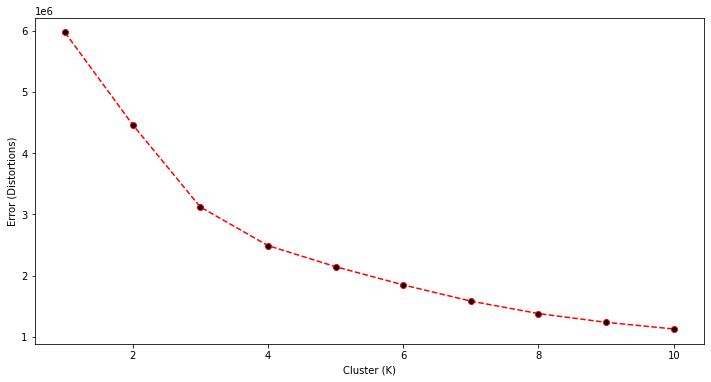

In [ ]:
# Elbow Method for Finding Best Cluster

error = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit_predict(scaled_df)
    error.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11),error,marker='o',ls='--',color='red',mfc='black')
plt.xlabel('Cluster (K)')
plt.ylabel('Error (Distortions)')
plt.show()

In [ ]:
# Model Building
model_1 = KMeans(n_clusters=4,random_state=22)

In [ ]:
# Fitting Data
model_1.fit(scaled_df)

KMeans(n_clusters=4, random_state=22)

In [ ]:
# Centroids of Clusters
centroids = model_1.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns=list(scaled_df))
centroids_df

,recency,frequency,monetary
0,1.854754,-0.227985,-0.214185
1,-0.362174,-0.119589,-0.184563
2,-0.707669,11.027821,6.940014
3,-0.374663,1.384092,2.274362


In [ ]:
# Clusters Labels
label_df = pd.DataFrame(model_1.labels_,columns=['labels'])
label_df.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Adding Values to Data Frame
scaled_df['labels'] = label_df['labels'].values

In [ ]:
# Data Head
scaled_df.head()

,recency,frequency,monetary,labels
reviewerID,,,,
A00000922W28P2OCH6JSE,-0.745404,0.640281,0.219401,1
A0000196KBA0ICH151EG,-0.539375,-0.302786,-0.502213,1
A00003783ISYSII6MAN88,-0.476375,-0.302786,-0.502213,1
A0000618JRL8NVY0J0AN,-0.581943,-0.302786,-0.502213,1
A0001488DZ7OUAZ5WMTX,-0.122211,-0.302786,-0.376718,1


In [ ]:
# Data Types
scaled_df.dtypes

recency      float64
frequency    float64
monetary     float64
labels         int32
dtype: object

In [ ]:
# Replacing Names of Clusters
scaled_df['labels'] = scaled_df['labels'].replace({0:'Churn-Out',1:'Need-Attention',2:'Best-Customer',3:'Promising'})

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Recency VS Frequency')

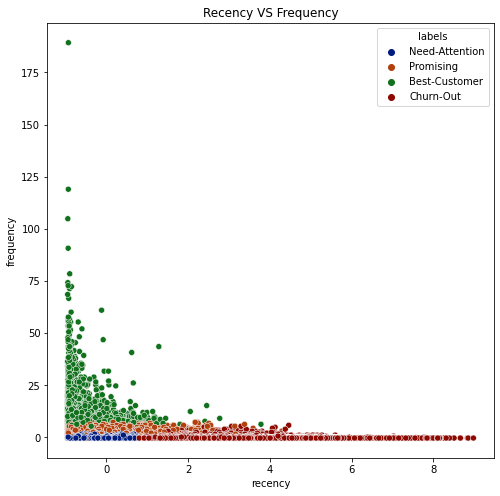

In [ ]:
# Recency VS Frequency
plt.figure(figsize=(8,8))
sb.scatterplot(x ='recency',y = 'frequency',data = scaled_df, hue='labels', palette='dark')
plt.title('Recency VS Frequency')
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Recency VS Monetary')

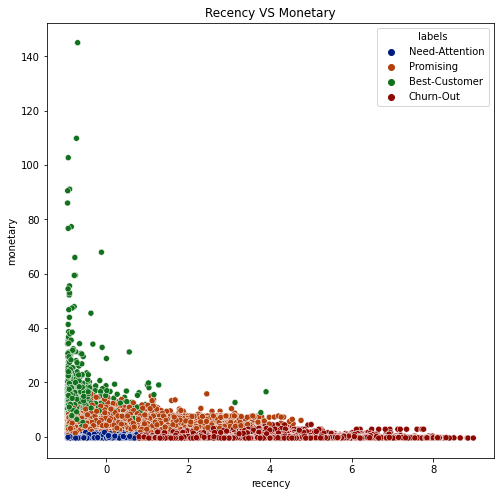

In [ ]:
# Recency VS Monetary
plt.figure(figsize=(8,8))
sb.scatterplot(x ='recency',y = 'monetary',data = scaled_df, hue='labels', palette='dark')
plt.title('Recency VS Monetary')
plt.show()

# Product Recommendation

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Review Data Head
review_sports.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3PMSRCL80KSA1,0000031852,Dee,"[0, 0]",Tutus are cute but a little thin. Can't compla...,4.0,Not bad,1388275200,"12 29, 2013"
1,A1SNLWGLFXD70K,0000031852,DEVA,"[0, 0]",I origonally didn't get the item I ordered. W...,4.0,Happy with purchase even though it came a lot ...,1392940800,"02 21, 2014"


In [ ]:
# Rating Details
rating = review_sports.overall.unique()
print('Ratings: ',rating)
print('Len of Ratings: ',len(rating))

Ratings:  [4. 5. 1. 2. 3.]
Len of Ratings:  5


In [ ]:
# Reviewer ID Details
id = review_sports.reviewerID.unique()
print('Reviewer ID: ',id)
print('Len of Reviewer ID: ',len(id))

Reviewer ID:  ['A3PMSRCL80KSA1' 'A1SNLWGLFXD70K' 'A1KJ4CVG87QW09' ... 'A1ZUS94QF43DAC'
 'A32T585IZ0DJX2' 'A1CYT9JXQXPFDD']
Len of Reviewer ID:  1990521


In [ ]:
# Product ID
pro = review_sports.asin.unique()
print('Products: ',pro)
print('Len of Products: ',len(pro))

Products:  ['0000031852' '0000031895' '0000031909' ... 'B00LR2PQ68' 'B00LUEBKKY'
 'B00LVHLRZ8']
Len of Products:  478898


In [ ]:
# Product which were sold more 
product_sales = review_sports.groupby('asin')['overall'].count().sort_values(ascending=False)
product_sales.head()

asin
B00BGO0Q9O    6016
B001HBHNHE    4201
B000M0MJU2    3376
B0095PZHRC    3344
B001T7QJ9O    3266
Name: overall, dtype: int64

In [ ]:
# Reviewer written more 
rev_sales = review_sports.groupby('reviewerID')['overall'].count().sort_values(ascending=False)
rev_sales.head()

reviewerID
A3OXHLG6DIBRW8    403
A8VI7KMUHI7ZH     254
AN81JUYW2SL24     224
AOVTLYTHVDNUX     194
AGGAQLXPVGM5D     168
Name: overall, dtype: int64

In [ ]:
# Filtering the Data which has more than 50 items sold
new_df=review_sports.groupby("asin").filter(lambda x:x['overall'].count() >= 50)

In [ ]:
# Data Head
new_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
604,A2IP71OBGF0DYB,2094869245,AKS7,"[0, 0]",I have seen more expensive with USB charging. ...,5.0,kool concept.,1401408000,"05 30, 2014"
605,AWG3H90WVZ0Z1,2094869245,Alec Nelson,"[0, 0]",This light will no doubt capture the attention...,4.0,Bright!,1377907200,"08 31, 2013"
606,A2NJ0EJXJXGQQU,2094869245,Alessio Bembo,"[3, 4]",the side light tracks really help to keep cars...,5.0,works perfect,1360800000,"02 14, 2013"
607,ABD83CDQWLN84,2094869245,Alex Avila,"[0, 0]",Packaged CorrectlyTakes 2 AAA BatteriesDiffere...,5.0,5 Led Bike Rear Light,1388966400,"01 6, 2014"
608,A374C8SBDBTSQ8,2094869245,alex,"[0, 0]",Very good lights. It has very good range brigh...,5.0,Very good lights. It has very good range brigh...,1395532800,"03 23, 2014"


In [ ]:
# Structure of Dataset
new_df.shape

(1449669, 9)

In [ ]:
# Slicing the Data 
new_df_1 = new_df[:100000]

In [ ]:
# Creating Pivot table for Checking Correlation
rating_matrix = new_df_1.pivot_table(index='asin',columns='reviewerID',values='overall',fill_value=0)

In [ ]:
# Data Head
rating_matrix.head()

reviewerID,A00063061AK7XBIZLCOXJ,A0010876CNE3ILIM9HV0,A00115942KQCYA4V5THGW,A00159721SOXMMFHA020T,A0029274J35Q1MYNKUWO,A005011233SVRED9Q0VY0,A00676013IBZZQ3UYWK47,A0071579ZEM74CBJAXU9,A00990251AX8J595YGONO,A01007512W8LIXGVKI7HZ,...,AZZIOA7GP3IKD,AZZIR2M36EGED,AZZLET9K4OLHP,AZZN3V2G7MGUG,AZZOGPUAJJRP1,AZZOGZ93PYIKM,AZZTCG8URXK9W,AZZU1VEO8KUXH,AZZU8SNMNVKLP,AZZWZZV473EVX
asin,,,,,,,,,,,,,,,,,,,,,
2094869245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245456259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245456313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245456321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000002IZ4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Structure of Pivot Table
rating_matrix.shape

(645, 94847)

In [ ]:
# Dimensionality Reduction
svd = TruncatedSVD(n_components=20)
dim_data = svd.fit_transform(rating_matrix)

In [ ]:
# Structure of SVD Data
dim_data.shape

(645, 20)

In [ ]:
# Correlation Matrix
corr_matrix = np.corrcoef(dim_data)

In [ ]:
# Shape of Correlation Matrix
corr_matrix.shape

(645, 645)

In [ ]:
# Taking Random Product for Selection
i = rating_matrix.index[350]

In [ ]:
# Displaying the Selected Product ID
i

'B000276CYE'

In [ ]:
# Taking Correlation Matrix Index into List
lst = list(rating_matrix.index)

In [ ]:
# Finding Index of Selected Product ID in List
j = lst.index(i)

In [ ]:
# Selection of Columns of Index of Product ID
correlation_product_ID = corr_matrix[j]

In [ ]:
# Fetching Correlated Product ID's

Recommend = list(rating_matrix.index[correlation_product_ID > 0.80])

Recommend.remove(i) 

In [ ]:
Recommend

['B000030056',
 'B0000AY1W1',
 'B0000BYMX6',
 'B00029KBF8',
 'B0002CTZ70',
 'B0006GSLDG',
 'B0006NW8JC']

# Time Series Demand Forecasting

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import statsmodels.api as sm
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Head
data.head(2)

,reviewerID,asin,reviewerName,helpful,help_per,reviewText,overall,sentiment,summary,unixReviewTime,reviewTime,title,price,imUrl,related,brand,categories,salesRank,description
reviewTime,,,,,,,,,,,,,,,,,,,
1998-08-03,A33UJ4LNZGOIRV,B000006CNN,eljibaro@crocker.com,"[0, 0]",0.0,"How do they do it? These guys create ageless, ...",5,Positive,North and South fuse seamlessly,902102400,1998-08-03,Hijos Del Sol,NaN,http://ecx.images-amazon.com/images/I/51PJW42Q...,{'also_viewed': ['B0014NPGWO']},NaN,"[CDs & Vinyl, Dance & Electronic, World Dance]",{'Music': 599639},Executive Stainless Steel LockbacksThese knive...
1998-10-17,A2KJLYGWEJLNLC,B000006CNN,JamieBroad@aol.com,"[0, 0]",0.0,Viva Quetzal's music beckons the core of all h...,5,Positive,"Invigorating, Soul-Reaching, Ulluminating, Tra...",908582400,1998-10-17,Hijos Del Sol,NaN,http://ecx.images-amazon.com/images/I/51PJW42Q...,{'also_viewed': ['B0014NPGWO']},NaN,"[CDs & Vinyl, Dance & Electronic, World Dance]",{'Music': 599639},Executive Stainless Steel LockbacksThese knive...


In [ ]:
# Datatypes
data.dtypes

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
help_per                 float64
reviewText                object
overall                    int64
sentiment                 object
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
title                     object
price                    float64
imUrl                     object
related                   object
brand                     object
categories                object
salesRank                 object
description               object
dtype: object

In [ ]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3268695 entries, 1998-08-03 to 2014-07-23
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   help_per        float64       
 5   reviewText      object        
 6   overall         int64         
 7   sentiment       object        
 8   summary         object        
 9   unixReviewTime  int64         
 10  reviewTime      datetime64[ns]
 11  title           object        
 12  price           float64       
 13  imUrl           object        
 14  related         object        
 15  brand           object        
 16  categories      object        
 17  salesRank       object        
 18  description     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(14)
memory usage: 498.8+ MB


In [ ]:
# Columns
data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'help_per',
       'reviewText', 'overall', 'sentiment', 'summary', 'unixReviewTime',
       'reviewTime', 'title', 'price', 'imUrl', 'related', 'brand',
       'categories', 'salesRank', 'description'],
      dtype='object')

In [ ]:
# Decomposing Data Function
def time_series_comp(data):
  decomp = seasonal_decompose(data,period=12)
  trend = decomp.trend
  season = decomp.seasonal
  irreg = decomp.resid
  return(trend,season,irreg)

In [ ]:
# Function for Time Series Components
def plot_comp(actual,trend,season,irreg,name):

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  xx = plt.plot(actual,color='black')
  plt.title(name+' Actual Data',fontsize=20,color="maroon",fontweight=20)

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  yy = plt.plot(trend,color='blue')
  plt.title(name+' Trend',fontsize=20,color="maroon",fontweight=20)

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  zz = plt.plot(season,color='green')
  plt.title(name+' Seasonality',fontsize=20,color="maroon",fontweight=20)

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  aa = plt.plot(irreg,color='red')
  plt.title(name+' Irregularity',fontsize=20,color="maroon",fontweight=20)

  return(xx,yy,zz,aa)

In [ ]:
def stationarity_check(data):
  p_value = adfuller(data)[1]
  if p_value < 0.05:
    dec = 'Model was Stationary - Proceed for Model Building'
  else:
    dec = 'Model was not Stationary - Take Differenced Data'
  return(dec)

In [ ]:
def plot(data):
  return(plot_acf(res_data_diff,c='red',lags=12),plot_pacf(res_data_diff,c='red',lags=12));

In [ ]:
def trend_order_iter(p,d,q):
  lst = []
  for i in range(p+1):
    for j in range(q+1):
      lst.append((i,0,j))
  return(lst)

def seasonal_order_iter(P,D,Q,L):
  lst = []
  for i in range(P+1):
    for j in range(Q+1):
      lst.append((i,D,j,L))
  return(lst)

def score_cal_1(t_lst,s_lst,data):
  AIC = []
  BIC = []
  MSE = []
  RMSE = []
  for i in t_lst:
    for j in s_lst:
      model = sm.tsa.statespace.SARIMAX(data,order=i,seasonal_order=j).fit()
      pred = model.fittedvalues
      AIC.append(model.aic)
      BIC.append(model.bic)
      MSE.append(round(metrics.mean_squared_error(data,pred),3))
      RMSE.append(round(metrics.mean_squared_error(data,pred,squared=False),3))
  c = pd.DataFrame({'AIC':AIC,'BIC':BIC,'MSE':MSE,'RMSE':RMSE},index=lst)
  print('Min AIC Order: ',c['AIC'].idxmin())
  print('Min BIC Order: ',c['BIC'].idxmin())
  print('Min MSE Order: ',c['MSE'].idxmin())
  print('Min RMSE Order: ',c['RMSE'].idxmin())

In [ ]:
# Ljung Box Test 
def fit_check(model):
    pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[12],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Bad model - Build the Model Again with differnt Parameters")
    else:
        print("Good model - Proceed for Forecasting")

In [ ]:
def error_check(data,forecast):
    mse = round(metrics.mean_squared_error(data,forecast),3)
    rmse = round(metrics.mean_squared_error(data,forecast,squared=False),3)
    mae = round(metrics.mean_absolute_error(data,forecast),3)
    mape = round(metrics.mean_absolute_percentage_error(data,forecast),3)
    return(mse,rmse,mae,mape)

def print_error(m1_mse, m1_rmse, m1_mae, m1_mape, Model):
    print('Mean Squared Error of '+Model+' is: ',m1_mse)
    print('Root Mean Squared Error of '+Model+' is: ',m1_rmse)
    print('Mean Absolute Error of '+Model+' is: ',m1_mae)
    print('Mean Absolute Percentage Error of '+Model+' is: ',m1_mape)
    
def aic_bic_scores(model):
    AIC = round(model.aic,3)
    BIC = round(model.bic,3)
    return(AIC,BIC)

def print_aic_bic(AIC, BIC, Model):
    print('AIC Score '+Model+' is: ',AIC)
    print('BIC Score '+Model+' is: ',BIC)

## Butler Creek Lula Universal Pistol Magazine Loader

In [ ]:
# Copying Data
df_1 = data.copy()

In [ ]:
# Products which are sold more
df_1.title.value_counts()

Fitbit Flex Wireless Activity + Sleep Wristband, Black                                  6016
Butler Creek Lula Universal Pistol Magazine Loader                                      4201
Intex Raised Downy Air Mattress - Queen                                                 3376
Fitbit Zip Wireless Activity Tracker, Magenta                                           3344
Howard Leight R-01526 Impact Sport Electronic Earmuff                                   3266
                                                                                        ... 
Wilson Staff Relaxed Cap                                                                   1
NBA Chicago Bulls Swingman Road Short - R28Ewbbu Youth                                     1
Ranger 300 Series Landing Net (36-Inch Handle, 24 x 26-Inch Hoop, 36-Inch Net Depth)       1
Chicago Bears NFL Superbowl Men's Varsity Jacket Coat                                      1
Sun Mountain 2013 C-130 College Licensed Cart Bag Ohio State          

In [ ]:
# Mask the Data
mask = (df_1['reviewTime'] > '2010-1-1') & (df_1['reviewTime'] <= '2013-12-31')
df_1 = df_1.loc[mask]

In [ ]:
# Data Filtering
data_time = df_1.loc[df_1.title == 'Butler Creek Lula Universal Pistol Magazine Loader','title']

In [ ]:
# Resampling the Data
res_data = data_time.resample('M').count()

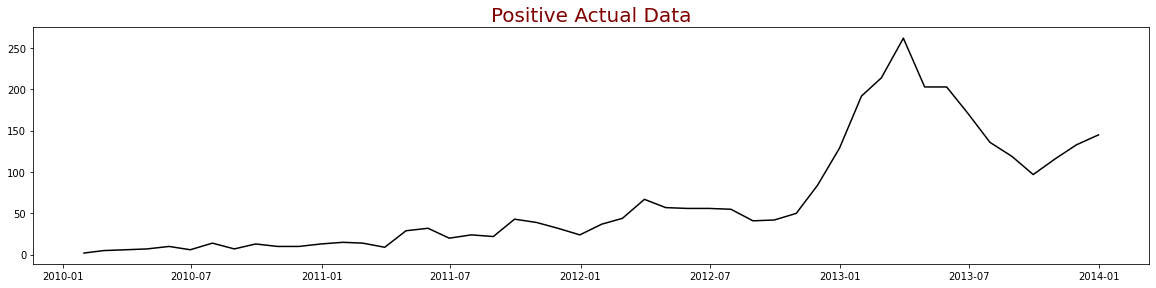

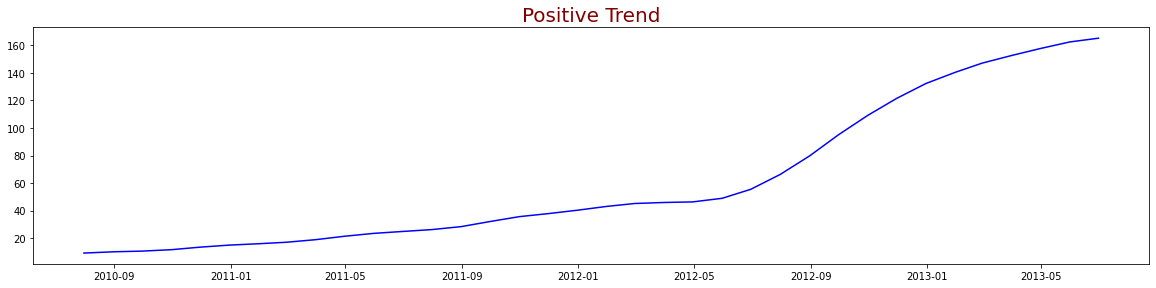

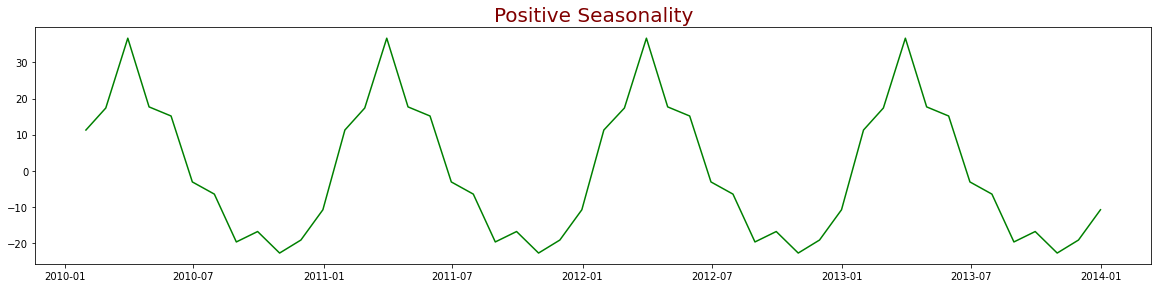

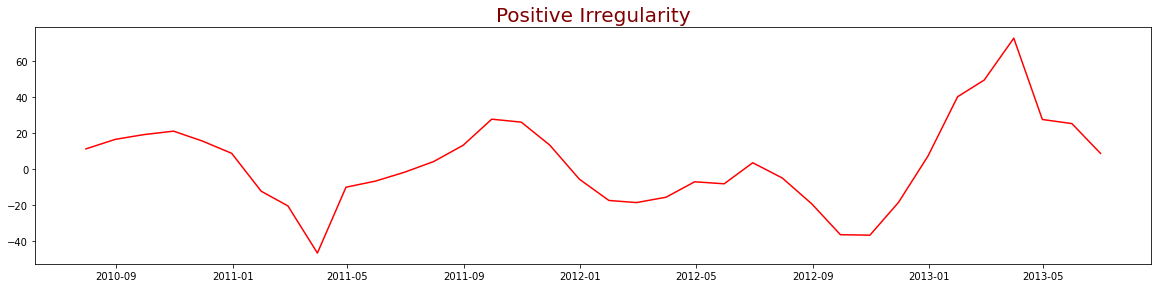

In [ ]:
# Positive Time Series Data Components
trend, season, irreg = time_series_comp(res_data)

plot_comp(res_data,trend,season,irreg,'Positive')
plt.show();

In [ ]:
# Stationary Check
stationarity_check(res_data)

'Model was not Stationary - Take Differenced Data'

In [ ]:
# Differencing Data
res_data_diff = res_data - res_data.shift(1)
res_data_diff.dropna(inplace=True)

In [ ]:
# Stationary Check
stationarity_check(res_data_diff)

'Model was Stationary - Proceed for Model Building'

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

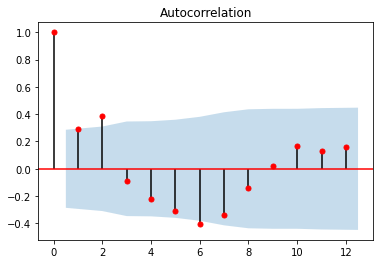

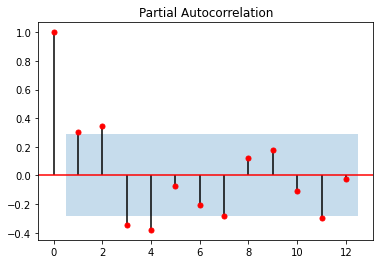

In [ ]:
# Plotting ACF and PACF
plot(res_data_diff)

In [ ]:
# Splitting Data
sep = int(res_data.shape[0]*0.8)

train = res_data[:sep+1]
test = res_data[sep:]

In [ ]:
# Model Building 
model_1 = sm.tsa.statespace.SARIMAX(train,order=(2,1,3),seasonal_order=(2,1,3,12)).fit()

In [ ]:
# Fit Check
fit_check(model_1)

Good model - Proceed for Forecasting


In [ ]:
# Forecasting the Data
pred = model_1.forecast(len(test)+30)

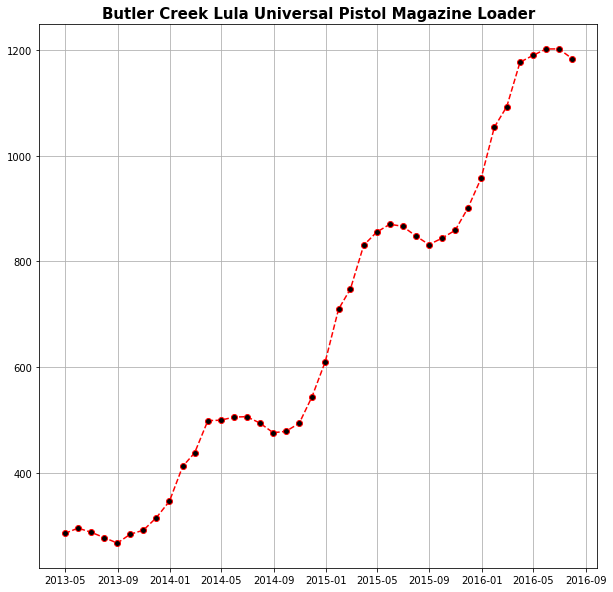

In [ ]:
# Plotting Data
plt.figure(figsize=(10,10))
plt.plot(pred,ls='--',marker='o',mfc='black',color='red')
plt.title('Butler Creek Lula Universal Pistol Magazine Loader',fontsize=15,fontweight = 'bold')
plt.grid()
plt.show();

In [ ]:
# Category Finding
X = df_1.loc[df_1.title == 'Butler Creek Lula Universal Pistol Magazine Loader','description'][:1]
for i in X:
  print(i)

Speed up and simplify the pistol loading process with the Butler Creek UpLula universal magazine loader. Compatible with virtually all 9mm, 10mm, .357, .40-, and .45-caliber mags, the loader/unloader makes filling a magazine as easy as flipping a switch. The UpLula works with both single and double stack pistols from almost all manufacturers. Shooting has never been so easy on your hands.


## Intex Raised Downy Air Mattress - Queen

In [ ]:
# Copying Data
df_1 = data.copy()

In [ ]:
df_1.shape

(3268695, 19)

In [ ]:
# Products which are sold more
df_1.title.value_counts()

Fitbit Flex Wireless Activity + Sleep Wristband, Black                                  6016
Butler Creek Lula Universal Pistol Magazine Loader                                      4201
Intex Raised Downy Air Mattress - Queen                                                 3376
Fitbit Zip Wireless Activity Tracker, Magenta                                           3344
Howard Leight R-01526 Impact Sport Electronic Earmuff                                   3266
                                                                                        ... 
Wilson Staff Relaxed Cap                                                                   1
NBA Chicago Bulls Swingman Road Short - R28Ewbbu Youth                                     1
Ranger 300 Series Landing Net (36-Inch Handle, 24 x 26-Inch Hoop, 36-Inch Net Depth)       1
Chicago Bears NFL Superbowl Men's Varsity Jacket Coat                                      1
Sun Mountain 2013 C-130 College Licensed Cart Bag Ohio State          

In [ ]:
# Mask the Data
mask = (df_1['reviewTime'] > '2010-1-1') & (df_1['reviewTime'] <= '2013-12-31')
df_1 = df_1.loc[mask]

In [ ]:
# Data Filtering
data_time = df_1.loc[df_1.title == 'Intex Raised Downy Air Mattress - Queen','title']

In [ ]:
# Resampling the Data
res_data = data_time.resample('M').count()

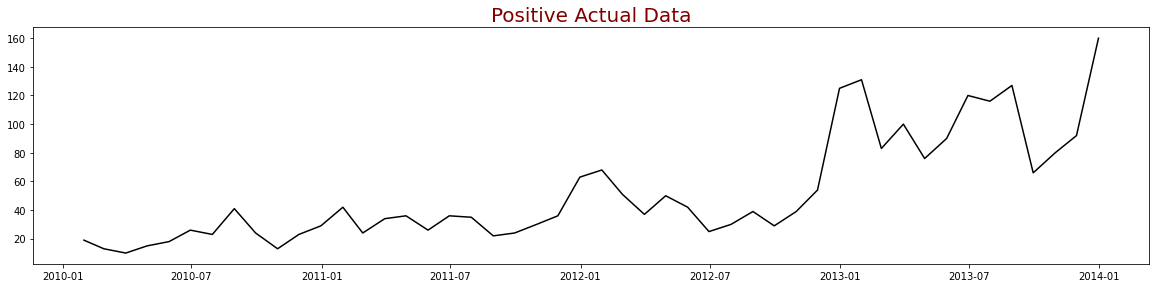

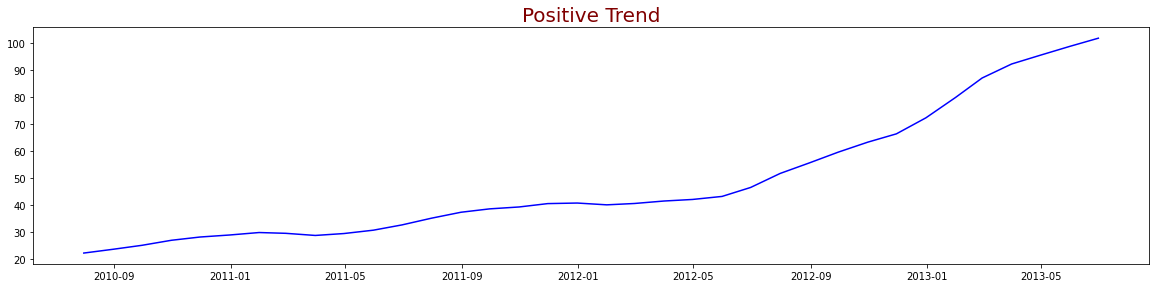

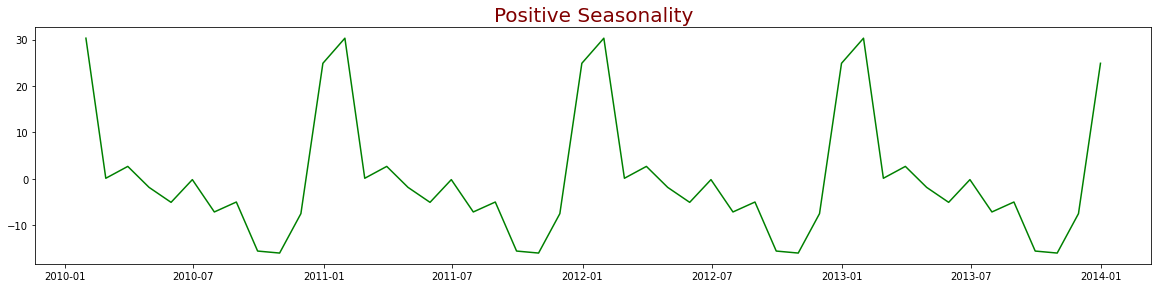

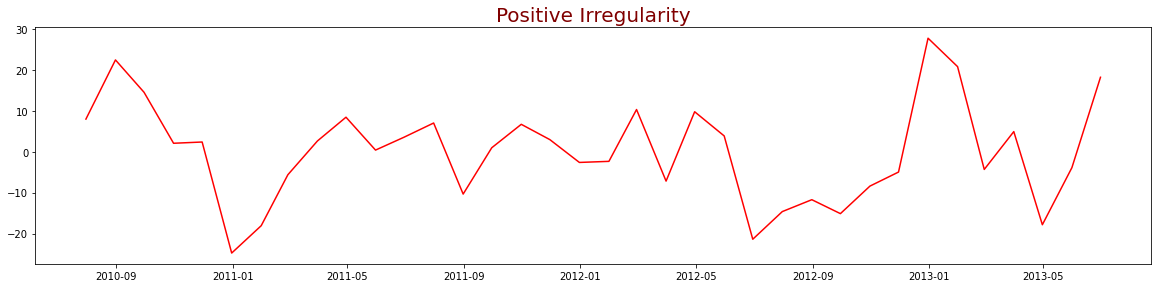

In [ ]:
# Positive Time Series Data Components
trend, season, irreg = time_series_comp(res_data)

plot_comp(res_data,trend,season,irreg,'Positive')
plt.show();

In [ ]:
# Stationary Check
stationarity_check(res_data)

'Model was not Stationary - Take Differenced Data'

In [ ]:
# Differencing Data
res_data_diff = res_data - res_data.shift(1)
res_data_diff.dropna(inplace=True)

In [ ]:
# Stationary Check
stationarity_check(res_data_diff)

'Model was Stationary - Proceed for Model Building'

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

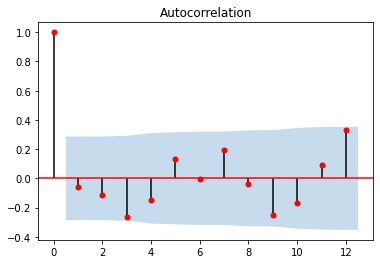

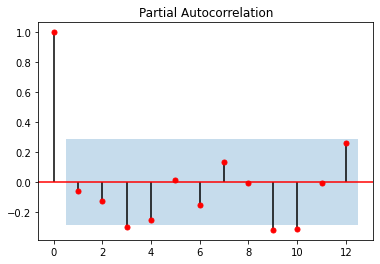

In [ ]:
# Plotting ACF and PACF
plot(res_data_diff)

In [ ]:
# Splitting Data
sep = int(res_data.shape[0]*0.8)

train = res_data[:sep+1]
test = res_data[sep:]

In [ ]:
# Model Building 
model_2 = sm.tsa.statespace.SARIMAX(train,order=(2,1,0),seasonal_order=(1,1,0,12)).fit()

In [ ]:
# Fit Check
fit_check(model_2)

Good model - Proceed for Forecasting


In [ ]:
# Forecasting the Data
pred = model_2.forecast(len(test)+30)

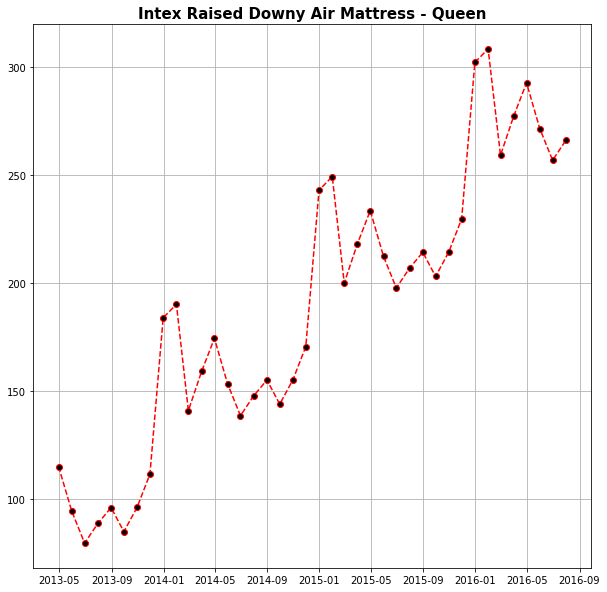

In [ ]:
# Plotting Data
plt.figure(figsize=(10,10))
plt.plot(pred,ls='--',marker='o',mfc='black',color='red')
plt.title('Intex Raised Downy Air Mattress - Queen',fontsize=15,fontweight = 'bold')
plt.grid()
plt.show();

In [ ]:
# Category Finding
X = df_1.loc[df_1.title == 'Intex Raised Downy Air Mattress - Queen','description'][:1]
for i in X:
  print(i)

Make every over-night stay a comfortable one with the Intex Raised Downy Air Mattress - Queen. This comfy, durable air mattress is constructed of heavy-duty vinyl for years of use. The raised top on this mattress provides extra comfort, and the built-in pump is an added convenience. Available in queen size and measures 60L x 80W x 22H inches inflated. Includes a handy carrying bag for easy storage and transport. About Intex Intex has been the world leader in the design and production of high-quality, innovative products for indoor and outdoor recreation for more than 40 years. The company's above ground pools, pool accessories, and pool toys are recognized around the world for their tremendous value. Intex is committed to designing and manufacturing products that meet stringent safety standards. The company conducts intensive testing on finished products to ensure the highest standards of quality and safety. The testing serves as a final check to make sure the products will provide yea